In [1]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Data File and Read
crime = "Cleaned_Crime_Data.csv"
crime_df = pd.read_csv(crime)

In [3]:
# Drop Indexed Column from Previous Files
del crime_df["Unnamed: 0"]
crime_df

,State,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
0,ALABAMA,HUNTSVILLE,2015,190106,723.0,5.0,65.0,173.0,480.0,4121.0,836.0,2903.0,382.0,0.0
1,ALASKA,ANCHORAGE,2015,301239,1615.0,16.0,323.0,271.0,1005.0,5732.0,811.0,4516.0,405.0,63.0
2,ARIZONA,CHANDLER,2015,258875,206.0,0.0,26.0,51.0,129.0,2524.0,384.0,2033.0,107.0,26.0
3,ARIZONA,GILBERT,2015,247324,95.0,2.0,14.0,14.0,65.0,1628.0,253.0,1310.0,65.0,12.0
4,ARIZONA,MESA,2015,471034,1019.0,6.0,142.0,219.0,652.0,5995.0,1041.0,4591.0,363.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,WASHINGTON,SPOKANE,2018,217066,791.0,4.0,179.0,105.0,503.0,7371.0,958.0,5616.0,797.0,19.0
1078,WASHINGTON,TACOMA,2018,213504,950.0,7.0,84.0,257.0,602.0,5641.0,963.0,3674.0,1004.0,46.0
1079,WASHINGTON,VANCOUVER,2018,176884,402.0,2.0,87.0,70.0,243.0,2876.0,393.0,1981.0,502.0,20.0
1080,WISCONSIN,GREEN BAY,2018,105331,243.0,1.0,40.0,25.0,177.0,810.0,106.0,657.0,47.0,3.0


In [4]:
# Change Formatting for Specific Columns
cols = ["Violent Crime", "Murder", "Rape", "Robbery", "Assault", "Property", "Burglary", "Larceny", "MV Theft", "Arson"]

# Format Float Values
crime_df[cols] = crime_df[cols].astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [5]:
crime_df = crime_df.astype({"Violent Crime": int, "Murder": int, "Rape": int, "Robbery": int, "Assault": int, "Property": int,
                           "Burglary": int, "Larceny": int, "MV Theft": int, "Arson": int})

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [6]:
# Specify columns to analyze
cols2 = ["Year", "Population", "Violent Crime", "Murder", "Rape", "Robbery", "Assault", "Property", "Burglary", "Larceny",
         "MV Theft", "Arson"]

# Create copy to not change original df
nat_stats = crime_df.copy()

# Summation for national statistics
year_national = nat_stats.groupby("Year")[cols2].sum()

In [7]:
# Change "Year" Column
year_national = pd.DataFrame(year_national)
year_national["Year"] = year_national["Year"].replace([531960, 532224, 558709, 558986], [2015, 2016, 2017, 2018])
year_national

,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
Year,,,,,,,,,,,,
2015,2015,82154806,246421,3260,19688,80543,142930,1278070,235646,893047,149377,7893
2016,2016,82154806,261371,3523,20943,83184,153721,1279130,226178,895806,159554,7434
2017,2017,87089545,275136,3955,23730,86416,166470,1345750,232191,943107,173054,8052
2018,2018,87089545,264382,3627,24627,76748,164114,1285536,208459,909777,168176,7233


In [8]:
# Total All Crimes per Year
year_national["Total"] = pd.Series([0 for x in range(len(year_national.index))])
year_national["Total"] = year_national[cols].sum()
year_national

,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson,Total
Year,,,,,,,,,,,,,
2015,2015,82154806,246421,3260,19688,80543,142930,1278070,235646,893047,149377,7893,nan
2016,2016,82154806,261371,3523,20943,83184,153721,1279130,226178,895806,159554,7434,nan
2017,2017,87089545,275136,3955,23730,86416,166470,1345750,232191,943107,173054,8052,nan
2018,2018,87089545,264382,3627,24627,76748,164114,1285536,208459,909777,168176,7233,nan


Text(0, 0.5, 'Murder Counts in the US')

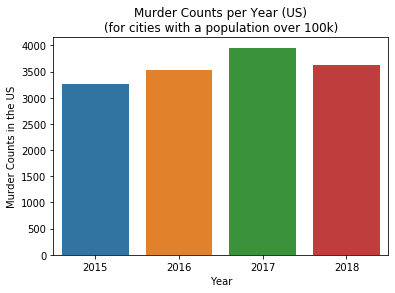

In [9]:
# Create Bar Graph to Show Counts of National Data
sns.barplot(x="Year", y="Murder", data=year_national)
plt.title("Murder Counts per Year (US)\n(for cities with a population over 100k)")
plt.ylabel("Murder Counts in the US")

Text(0, 0.5, 'Violent Crime Counts in the US')

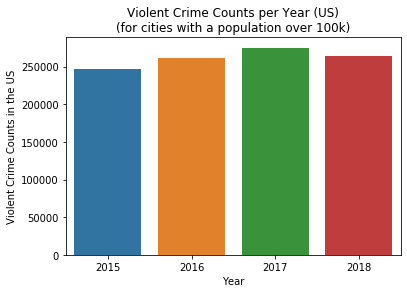

In [11]:
# Create Bar Graph to Show Counts of National Data
sns.barplot(x="Year", y="Violent Crime", data=year_national)
plt.title("Violent Crime Counts per Year (US)\n(for cities with a population over 100k)")
plt.ylabel("Violent Crime Counts in the US")

Text(0, 0.5, 'Rape Counts in the US')

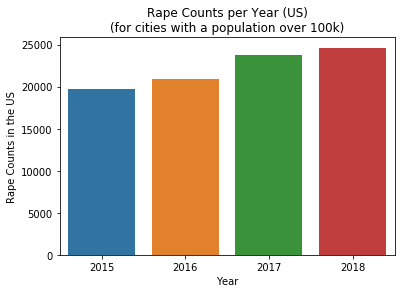

In [12]:
# Create Bar Graph to Show Counts of National Data
sns.barplot(x="Year", y="Rape", data=year_national)
plt.title("Rape Counts per Year (US)\n(for cities with a population over 100k)")
plt.ylabel("Rape Counts in the US")

Text(0, 0.5, 'Robbery Counts in the US')

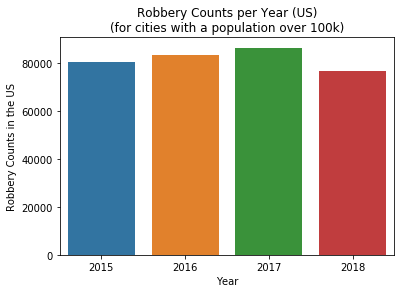

In [13]:
# Create Bar Graph to Show Counts of National Data
sns.barplot(x="Year", y="Robbery", data=year_national)
plt.title("Robbery Counts per Year (US)\n(for cities with a population over 100k)")
plt.ylabel("Robbery Counts in the US")

Text(0, 0.5, 'Assault Counts in the US')

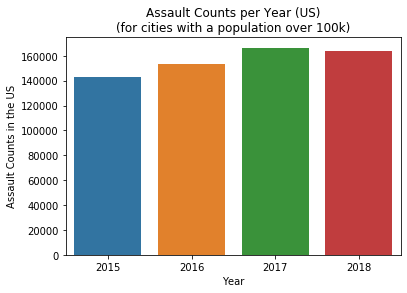

In [14]:
# Create Bar Graph to Show Counts of National Data
sns.barplot(x="Year", y="Assault", data=year_national)
plt.title("Assault Counts per Year (US)\n(for cities with a population over 100k)")
plt.ylabel("Assault Counts in the US")

Text(0, 0.5, 'Property Damage Counts in the US')

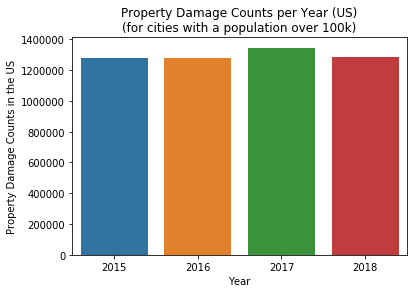

In [16]:
# Create Bar Graph to Show Counts of National Data
sns.barplot(x="Year", y="Property", data=year_national)
plt.title("Property Damage Counts per Year (US)\n(for cities with a population over 100k)")
plt.ylabel("Property Damage Counts in the US")

Text(0, 0.5, 'Burglary Counts in the US')

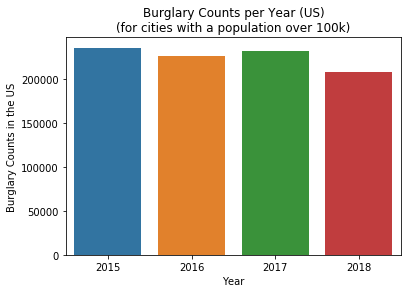

In [17]:
# Create Bar Graph to Show Counts of National Data
sns.barplot(x="Year", y="Burglary", data=year_national)
plt.title("Burglary Counts per Year (US)\n(for cities with a population over 100k)")
plt.ylabel("Burglary Counts in the US")

Text(0, 0.5, 'Larceny Counts in the US')

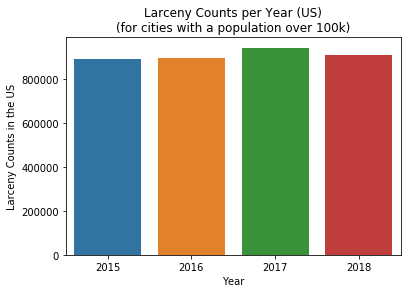

In [18]:
# Create Bar Graph to Show Counts of National Data
sns.barplot(x="Year", y="Larceny", data=year_national)
plt.title("Larceny Counts per Year (US)\n(for cities with a population over 100k)")
plt.ylabel("Larceny Counts in the US")

Text(0, 0.5, 'Motorvehicle Theft Counts in the US')

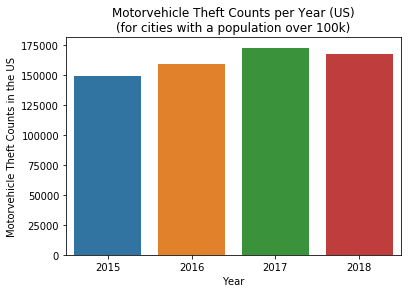

In [19]:
# Create Bar Graph to Show Counts of National Data
sns.barplot(x="Year", y="MV Theft", data=year_national)
plt.title("Motorvehicle Theft Counts per Year (US)\n(for cities with a population over 100k)")
plt.ylabel("Motorvehicle Theft Counts in the US")

Text(0, 0.5, 'Arson Counts in the US')

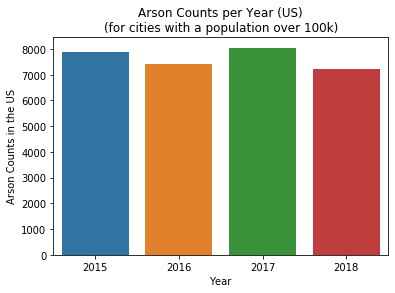

In [20]:
# Create Bar Graph to Show Counts of National Data
sns.barplot(x="Year", y="Arson", data=year_national)
plt.title("Arson Counts per Year (US)\n(for cities with a population over 100k)")
plt.ylabel("Arson Counts in the US")

In [ ]:
# Find Murder Capital
m_cap = nat_stats.loc[nat_stats.groupby("Year")["Murder"].max()]
m_cap

In [ ]:
# Create copy to not change original df
state_stats = crime_df.copy()

# Summation for state statistics
year_state = state_stats.groupby(["State", "Year"]).sum()

year_state

In [ ]:
grouped_total = crime_df.copy()
grouped_total["Total"] = ""
grouped_total["Total"] = grouped_total[cols].sum(axis=1)
grouped_total

In [ ]:
grouped_total.to_csv("Grouped.csv")